# Introduction

In this blog post, I’d like to give you a relatively nontechnical introduction to Bayesian statistics. The Bayesian approach to statistics has become increasingly popular, and you can fit Bayesian models using many different tools. This blog entry will provide a brief introduction to the concepts and jargon of Bayesian statistics. Then, I will introduce the basics of Markov chain Monte Carlo (MCMC) using the Metropolis–Hastings algorithm.

In [385]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Bayesian Statistics

Many of us were trained using a frequentist approach to statistics where parameters are treated as fixed but unknown quantities. We can estimate these parameters using samples from a population, but different samples give us different estimates. The distribution of these different estimates is called the sampling distribution, and it quantifies the uncertainty of our estimate. But the parameter itself is still considered fixed.

The Bayesian approach is a different way of thinking about statistics. Parameters are treated as random variables that can be described with probability distributions. We don’t even need data to describe the distribution of a parameter—probability is simply our degree of belief.

Let’s work through a coin toss example to develop our intuition. I will refer to the two sides of the coin as “heads” and “tails”. If I toss the coin in the air, it must land on either the “heads” side or the “tails” side, and I will use $\theta$ to denote the probability that the coin lands with the “heads” side facing up.

# Prior distributions

The first step in our Bayesian example is to define a prior distribution for 𝜃. A prior distribution is a mathematical expression of our belief about the distribution of the parameter. The prior distribution can be based on our experience or assumptions about the parameter, or it could be a simple guess. For example, I could use a uniform distribution to express my belief that the probability of “heads” could be anywhere between zero and one with equal probability. Figure 1 shows a beta distribution with parameters one and one that is equivalent to a uniform distribution on the interval zero to one.



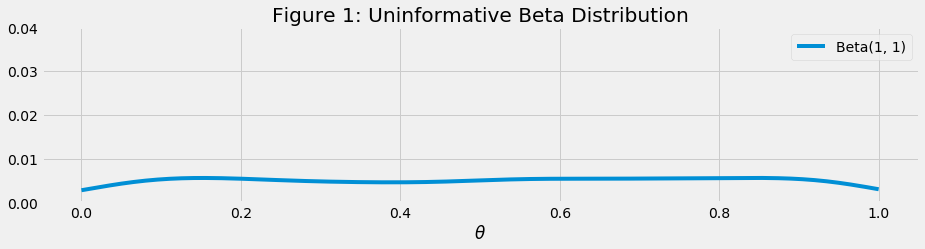

In [378]:
prior_beta_uninformative = stats.beta.rvs(1, 1, size = 1000)
density = stats.gaussian_kde(prior_beta_uninformative)
x = np.linspace(0,1,200)
y = density(x) / density(x).sum(axis=0,keepdims=1)
fig, ax = plt.subplots(figsize=(14,3))
ax.plot(x, y, label="Beta(1, 1)")
ax.set_ylim(bottom = 0, top = .04)
ax.set_title("Figure 1: Uninformative Beta Distribution")
ax.set_xlabel("$\\theta$")
plt.legend()
plt.show()


My beta(1,1) distribution is called an uninformative prior because all values of the parameter have equal probability.

Common sense would suggest that the probability of heads is closer to 0.5, and I could express this belief mathematically by increasing the parameters of my beta distribution. Figure 2 shows a beta distribution with parameters 30 and 30.



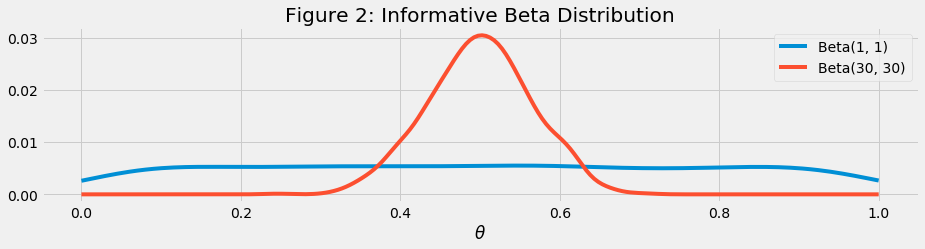

In [376]:
prior_beta_informative = stats.beta.rvs(30,30, size = 1000)
density_informative = stats.gaussian_kde(prior_beta_informative)
y_informative = density_informative(x) / density_informative(x).sum(axis = 0, keepdims = 1)

fig, ax = plt.subplots(figsize=(14,3))
ax.plot(x, y, label="Beta(1, 1)")
ax.plot(x, y_informative, label="Beta(30, 30)")
ax.set_title("Figure 2: Informative Beta Distribution")
ax.set_xlabel("$\\theta$")
ax.legend()
plt.show()

Figure 2 is called an informative prior because all values of the parameter do not have equal probability.



## Likelihood functions

The second step in our Bayesian example is to collect data and define a likelihood function. Let’s say that I toss the coin 10 times and observe 4 heads.

In [234]:
obs_coin_flips = np.array([1]*4 + [0]*6)
obs_coin_flips

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

Next, I need to specify a likelihood function for my data. Probability distributions quantify the probability of the data for a given parameter value (that is, $P(y|\theta)$), whereas a likelihood function quantifies the likelihood of a parameter value given the data (that is, $L(\theta|y)$). The functional form is the same for both, and the notation is often used interchangeably (that is, $P(y|\theta)=L(\theta|y))$.

The binomial probability distribution is often used to quantify the probability of the number of successes out of a fixed number of trials. Here I can quantify the results of my experiment using a binomial likelihood function that quantifies the likelihood of $\theta$ given 4 heads out of 10 tosses.

The blue line in figure 4 shows a binomial likelihood function for theta given 4 heads out of 10 coin tosses. I have rescaled the graph of the likelihood function so that the area under the curve equals one. This allows me to compare the likelihood function with the prior distribution graphed in red.



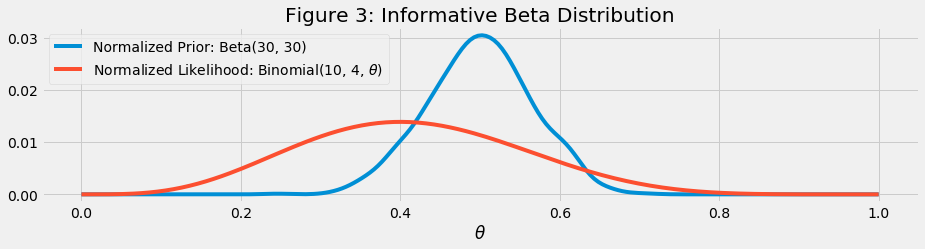

In [379]:
x_pdf = np.linspace(0,1,200)
y_pdf = stats.binom.pmf(4,10, x_pdf)
density = stats.gaussian_kde(prior_beta_informative)
# Normalize y-axis to 1
y_prior = density(x_pdf)/density(x_pdf).sum(axis=0,keepdims=1)
y_pdf = y_pdf / y_pdf.sum(axis=0, keepdims=1)

# Overlay densitites
fig, ax = plt.subplots(figsize=(14,3))
ax.plot(x_pdf, y_prior, label = "Normalized Prior: Beta(30, 30)")
ax.plot(x_pdf, y_pdf, label = "Normalized Likelihood: Binomial(10, 4, $\\theta$)")
ax.set_title("Figure 3: Informative Beta Distribution")
ax.set_xlabel("$\\theta$")
ax.legend(loc = "upper left")
plt.show()

## Posterior distributions

The third step in our Bayesian example is to calculate a posterior distribution. This allows us to update our belief about the parameter with the results of our experiment. In simple cases, we can compute a posterior distribution by multiplying the prior distribution and the likelihood function. Technically, the posterior is proportional to the product of the prior and the likelihood, but let’s keep things simple for now.

\begin{align}
Posterior & = Prior∗Likelihood \\
P(\theta|y) &= P(\theta)∗P(y|\theta) \\
P(\theta|y)&=Beta(\alpha,\beta)∗Binomial(n,y,\theta) \\
P(\theta|𝑦)&=Beta(y+\alpha,n-y+\beta)
\end{align}


In this example, the beta distribution is called a “conjugate prior” for the binomial likelihood function because the posterior distribution belongs to the same distribution family as the prior distribution. Both the prior and the posterior have beta distributions.

Figure 4 shows the posterior distribution of theta with the prior distribution and the likelihood function.



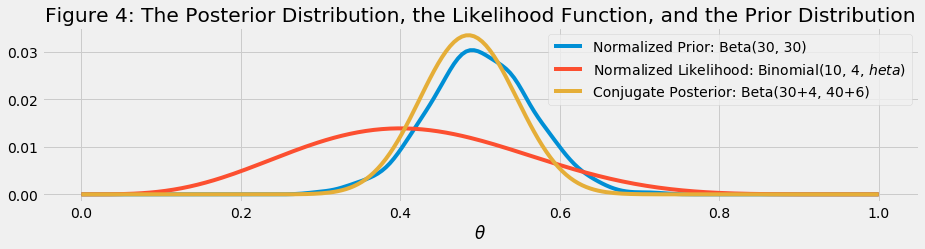

In [363]:
x = np.linspace(0,1,200)
y_likelihood = stats.binom.pmf(4,10, x_pdf)
_density = stats.gaussian_kde(prior_beta_informative)
y_posterior = stats.beta.pdf(x, 4+30, 10-4+30)

# Normalize y-axis to 1
y_prior_norm = _density(x)/_density(x).sum(axis=0,keepdims=1)
y_likelihood_norm = y_likelihood / y_likelihood.sum(axis=0, keepdims=1)
y_posterior_norm = y_posterior / y_posterior.sum(axis=0, keepdims=1)

# Overlay densitites
fig, ax = plt.subplots(figsize=(14,3))
ax.plot(x, y_prior_norm, label = "Normalized Prior: Beta(30, 30)")
ax.plot(x, y_likelihood_norm, label = "Normalized Likelihood: Binomial(10, 4, $\theta$)")
ax.plot(x, y_posterior_norm, label = "Conjugate Posterior: Beta(30+4, 40+6)")
ax.set_xlabel("$\\theta$")
ax.set_title("Figure 4: The Posterior Distribution, the Likelihood Function, and the Prior Distribution")
plt.legend()
plt.show()

Notice that the posterior closely resembles the prior distribution. This is because we used an informative prior and a relatively small sample size. If we had used a completely uninformative prior like Beta(1,1), we would see the likelihood completely dominate the data. In practice, this means that we can reduce the standard deviation of the posterior distribution using smaller sample sizes when we use more informative priors. But a similar reduction in the standard deviation may require a larger sample size when we use a weak or uninformative prior. 

## Using the posterior

After we calculate the posterior distribution, we can calculate the mean or median of the posterior distribution, a 95% equal tail credible interval, the probability that theta lies within an interval, and many other statistics.

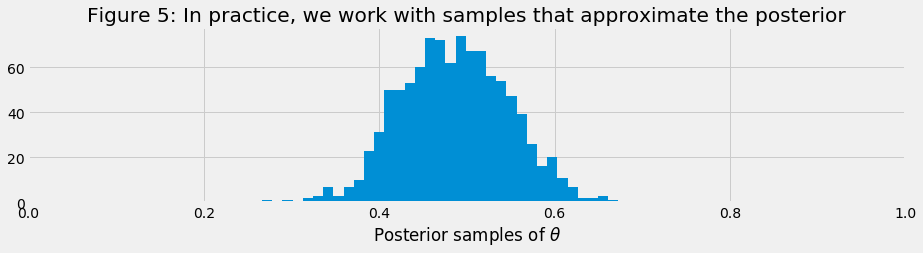

In [382]:
# Draw samples from the posterior
posterior_samples = stats.beta.rvs(4+30, 10-4+30, size = 1000)

fig, ax = plt.subplots(figsize=(14,3))
ax.hist(posterior_samples, bins = 35)
ax.set_xlim(0, 1)
ax.set_xlabel("Posterior samples of $\\theta$")
ax.set_title("Figure 5: In practice, we work with samples that approximate the posterior")
plt.show()

[[Lets run through an example of how to interrogate the posterior]]

In [384]:
# HDI code

## Why use Bayesian statistics?

There are many appealing features of the Bayesian approach to statistics. Perhaps the most appealing feature is that the posterior distribution from a previous study can often serve as the prior distribution for subsequent studies. For example, we might conduct a small pilot study using an uninformative prior distribution and use the posterior distribution from the pilot study as the prior distribution for the main study. This approach would increase the precision of the main study.

## Summary
In this post, we focused on the concepts and jargon of Bayesian statistics and worked a simple coin flipping example. In this example, we were able to analytically solve for the posterior distribution's probability density function because the beta distribution is a conjugate prior for the binomial distribution. In most real world problems, we can't do this and instead we rely on numerical optimization methods known as MCMC to explore the parameter space and determine its posterior.

Next time, we will explore MCMC using the Metropolis–Hastings algorithm.

# Applied Bayes - MCMC
TODO:
https://blog.stata.com/2016/11/15/introduction-to-bayesian-statistics-part-2-mcmc-and-the-metropolis-hastings-algorithm/

Clean up colors using viridis